In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay,f1_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
# Model from Telco_sklearn.ipynb file
import joblib
best_model = joblib.load('best_xgb_model.joblib')

In [4]:
from sdv.single_table import GaussianCopulaSynthesizer
from sdv.metadata import Metadata

In [ ]:
# Only run this commented code if you need to create metadata from the dataframe
# metadata= Metadata.detect_from_dataframe(df)
# metadata.save_to_json('metadata.json')

#Make synthesized data using sdv
metadata = Metadata.load_from_json('metadata.json')
synthesizer = GaussianCopulaSynthesizer(metadata)

synthesizer.fit(df)
sample = synthesizer.sample(num_rows=100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        100 non-null    object 
 1   gender            100 non-null    object 
 2   SeniorCitizen     100 non-null    int64  
 3   Partner           100 non-null    object 
 4   Dependents        100 non-null    object 
 5   tenure            100 non-null    int64  
 6   PhoneService      100 non-null    object 
 7   MultipleLines     100 non-null    object 
 8   InternetService   100 non-null    object 
 9   OnlineSecurity    100 non-null    object 
 10  OnlineBackup      100 non-null    object 
 11  DeviceProtection  100 non-null    object 
 12  TechSupport       100 non-null    object 
 13  StreamingTV       100 non-null    object 
 14  StreamingMovies   100 non-null    object 
 15  Contract          100 non-null    object 
 16  PaperlessBilling  100 non-null    object 
 17

In [8]:
sample.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,sdv-id-pJvgxt,Male,0,Yes,No,64,Yes,No,No,No internet service,...,Yes,No internet service,Yes,Yes,Two year,Yes,Mailed check,30.13,162.3,No
1,sdv-id-QZoJix,Male,0,Yes,No,0,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,No,Credit card (automatic),35.71,1274.45,No
2,sdv-id-sUpodm,Male,0,No,Yes,0,Yes,No,Fiber optic,No internet service,...,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,37.59,4149.45,No
3,sdv-id-VQZvMN,Female,0,Yes,No,72,Yes,No,Fiber optic,No,...,Yes,No,No,Yes,One year,Yes,Credit card (automatic),111.04,6109.75,No
4,sdv-id-fHaBym,Male,0,Yes,No,52,Yes,Yes,No,No internet service,...,Yes,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),47.43,470.6,Yes


In [6]:
num_labels = sample["Churn"].map({'Yes': 1, 'No': 0})

Accuracy: 0.75
F1 Score: 0.6268656716417911
              precision    recall  f1-score   support

           0       0.89      0.75      0.81        72
           1       0.54      0.75      0.63        28

    accuracy                           0.75       100
   macro avg       0.71      0.75      0.72       100
weighted avg       0.79      0.75      0.76       100



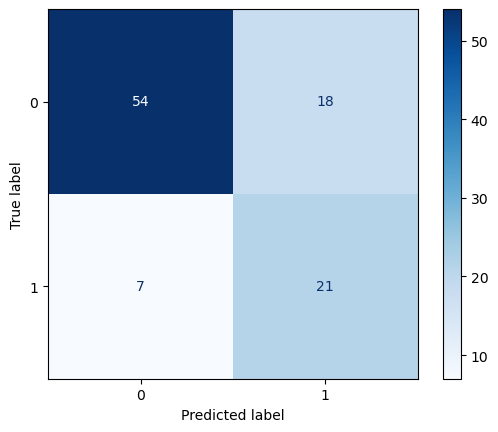

In [9]:
preds = best_model.predict(sample)

print(f"Accuracy: {accuracy_score(num_labels, preds)}")
print(f"F1 Score: {f1_score(num_labels, preds)}")
print(classification_report(num_labels, preds))
cm = confusion_matrix(num_labels, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
plt.show(disp.plot(cmap=plt.cm.Blues))